types of nebulae:
- Supernova remnants
- Emission nebulae
- Reflection nebulae
- Dark nebulae
- Planetary nebulae

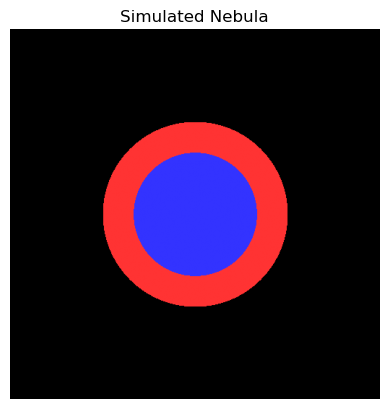

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def generate_nebula_image(width, height):
    # 生成模拟星云图像
    image = np.zeros((width, height, 3))
    
    # 模拟发射星云：红色区域
    rr, cc = np.ogrid[:width, :height]
    mask = (rr - width / 2) ** 2 + (cc - height / 2) ** 2 < (min(width, height) / 4) ** 2
    image[mask] = [1, 0.2, 0.2]  # 红色
    
    # 模拟反射星云：蓝色区域
    mask = (rr - width / 2) ** 2 + (cc - height / 2) ** 2 < (min(width, height) / 6) ** 2
    image[mask] = [0.2, 0.2, 1]  # 蓝色
    
    return image

# 生成图像
image = generate_nebula_image(512, 512)

# 绘制图像
plt.imshow(image)
plt.title('Simulated Nebula')
plt.axis('off')
plt.show()
plt.close()

In [1]:
from panda3d.core import *
from direct.showbase.ShowBase import ShowBase
# pipe = GraphicsPipeSelection.get_global_ptr().make_pipe("pandagl", "")

In [2]:
type(pipe)

NoneType

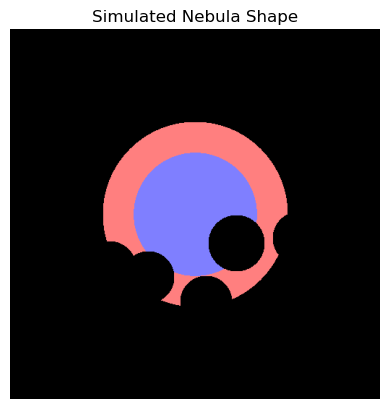

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_nebula_shape():
    # 生成随机的星云形状
    width, height = 512, 512
    image = np.zeros((width, height, 3))

    # 发射星云（泡沫状）
    rr, cc = np.ogrid[:width, :height]
    mask = (rr - width / 2) ** 2 + (cc - height / 2) ** 2 < (min(width, height) / 4) ** 2
    image[mask] = [1, 0.5, 0.5]  # 红色发射

    # 反射星云（蓝色区域）
    mask = (rr - width / 2) ** 2 + (cc - height / 2) ** 2 < (min(width, height) / 6) ** 2
    image[mask] = [0.5, 0.5, 1]  # 蓝色反射

    # 添加随机分布的暗星云区域
    num_dark_spots = 10
    for _ in range(num_dark_spots):
        cx, cy = np.random.randint(0, width), np.random.randint(0, height)
        radius = np.random.randint(20, 50)
        rr, cc = np.ogrid[:width, :height]
        mask = (rr - cx) ** 2 + (cc - cy) ** 2 < radius ** 2
        image[mask] = [0, 0, 0]  # 黑色暗星云

    return image

# 生成图像
image = generate_nebula_shape()

# 绘制图像
plt.imshow(image)
plt.title('Simulated Nebula Shape')
plt.axis('off')
plt.show()


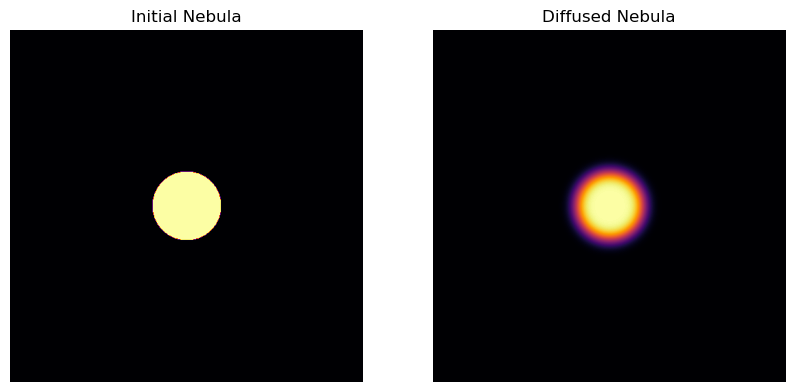

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 初始化星云区域
def initialize_nebula(size, center, radius):
    x, y = np.ogrid[:size, :size]
    mask = (x - center[0])**2 + (y - center[1])**2 < radius**2
    return mask.astype(float)

# 模拟气体扩散
def diffuse_gas(image, sigma):
    return gaussian_filter(image, sigma=sigma)

# 设置参数
size = 512
center = (size // 2, size // 2)
initial_radius = 50
diffusion_sigma = 10

# 初始化星云
nebula = initialize_nebula(size, center, initial_radius)

# 运行气体扩散模拟
diffused_nebula = diffuse_gas(nebula, diffusion_sigma)

# 绘制图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Initial Nebula')
plt.imshow(nebula, cmap='inferno')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Diffused Nebula')
plt.imshow(diffused_nebula, cmap='inferno')
plt.axis('off')

plt.show()


TypeError: only length-1 arrays can be converted to Python scalars

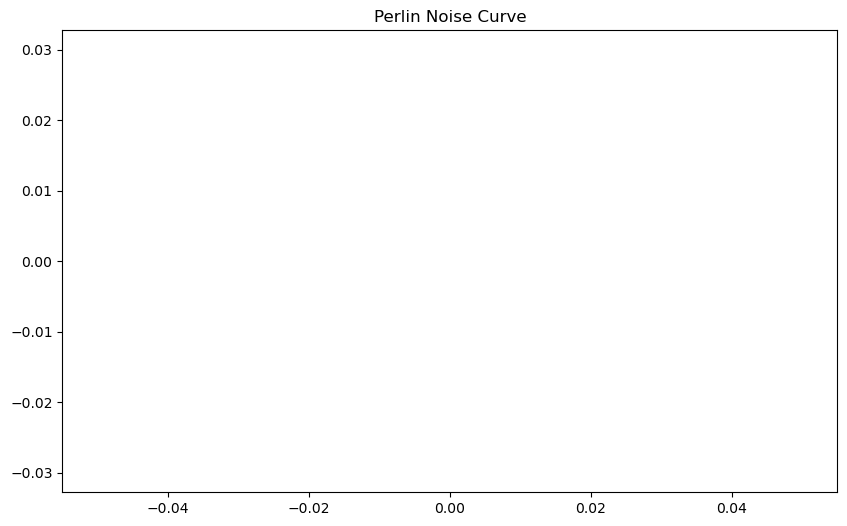

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Noise:
    def __init__(self, octaves=1):
        self.p = np.random.randint(0, 256, 512, dtype=np.uint8)
        self.octaves = octaves

    def lerp(self, t, a, b):
        return a + t * (b - a)

    def grad2d(self, i, x, y):
        v = x if (i & 1) == 0 else y
        return -v if (i & 2) == 0 else v

    def noise2d(self, x2d, y2d):
        X = int(x2d) & 255
        Y = int(y2d) & 255
        x = x2d - int(x2d)
        y = y2d - int(y2d)
        fx = (3 - 2 * x) * x ** 2
        fy = (3 - 2 * y) * y ** 2
        p0 = self.p[X] + Y
        p1 = self.p[X + 1] + Y
        return self.lerp(
            fy,
            self.lerp(
                fx,
                self.grad2d(self.p[p0], x, y),
                self.grad2d(self.p[p1], x - 1, y)
            ),
            self.lerp(
                fx,
                self.grad2d(self.p[p0 + 1], x, y - 1),
                self.grad2d(self.p[p1 + 1], x - 1, y - 1)
            )
        )

    def noise(self, x, y):
        e = 1
        k = 1
        s = 0
        for i in range(self.octaves):
            e *= 0.5
            s += e * (1 + self.noise2d(k * x, k * y)) / 2
            k *= 2
        return s

def generate_curve(noise, num_curves=300):
    plt.figure(figsize=(10, 6))
    plt.axis('equal')
    plt.title('Perlin Noise Curve')

    for i in range(num_curves):
        j = np.arange(-101, 100)
        h = noise.noise(100 + j * 0.01, 100 + i * 0.01)
        plt.plot(j, 0.1 * i + h * 200 - 100, color='black', alpha=0.33)

    plt.show()

# Create a Noise instance
perlin = Noise(octaves=3)
generate_curve(perlin)


In [ ]:
n = 2500


In [1]:
# simplex noise
# perlin noise
# OpenSimplex noise
# Simulation noise ?
# Value noise
# Worley noise
# diamond square
# heightmap

https://en.wikipedia.org/wiki/Procedural_generation#:~:text=In%20computing%2C%20procedural%20generation%20%28sometimes%20shortened%20as%20proc-gen%29,algorithms%20coupled%20with%20computer-generated%20randomness%20and%20processing%20power.

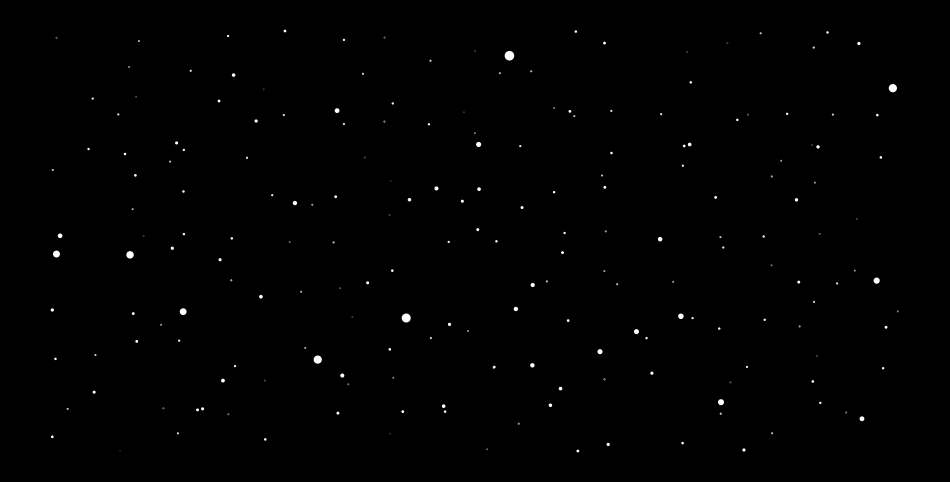

In [8]:
# generate starlight
import numpy as np
import torch
from matplotlib import pyplot as plt
shape = (20,10)

# Make rectangular grid
x, y = np.arange(shape[0]), np.arange(shape[1])
x, y = np.meshgrid(x, y, indexing="ij")

# Generate noise: random displacements r at random angles phi
np.random.seed(0)
phi = np.random.uniform(0, 2 * np.pi, x.shape)
r = np.random.uniform(0, 0.5, x.shape)

# Shrink star size to keep it within its cell.
# Also, we want more small stars - for the background effect.
# To do that we rescale displacements: r -> 1/2 - 0.001 / r.
r = np.clip(0.5 - 1e-3 / r, 0, None)
size = 200 * (0.5 - r) - 0.4

# Convert r and phi to cartesian coordinates using the Euler formula.
z = r * np.exp(1j * phi)
dx, dy = z.real, z.imag
x, y = x + dx, y + dy

plt.figure(figsize=(12,6), facecolor="black")
plt.scatter(x, y, c="white", s=size)
plt.axis("off")
plt.show()

(480, 640, 4)

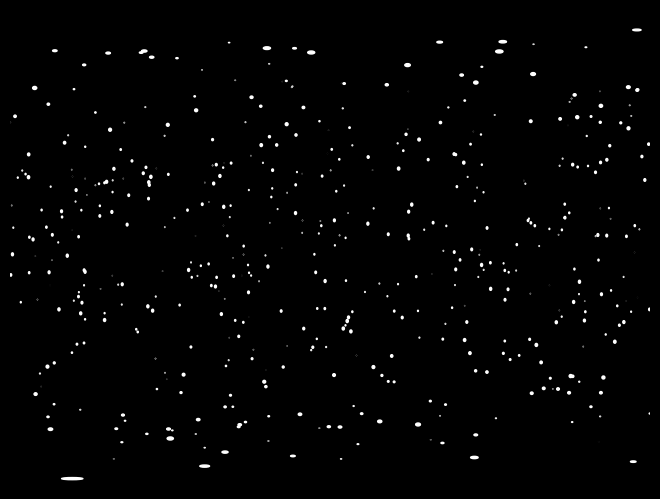

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(
    facecolor="black", 
    # figsize=(500,250)
)

# Number of ellipses
n_stars = 500

# Loop to add ellipses
np.random.seed(0)  # todo: use torch random state
cos_pos_theta = np.random.uniform(-1,1, n_stars)
pos_theta = np.arccos(cos_pos_theta)
pos_phi = np.random.uniform(0,2*np.pi, n_stars)
sizes = np.random.uniform(0, .02, n_stars) 

h = sizes
w = sizes / np.sin(pos_theta)
centers = np.vstack([pos_phi,pos_theta]).T
for _ in range(n_stars):
    # Random center, width, height, and angle for the ellipse
    
    # x, y = np.random.rand(2) * 10  # random center between 0 and 10
    # width, height = np.random.rand(2) * 2  # random width and height between 0 and 2
    # angle = np.random.rand() * 360  # random rotation angle
    
    # Create an ellipse
    ellipse = Ellipse((pos_phi[_], pos_theta[_]), w[_], h[_], color='white')
    
    # Add the ellipse to the plot
    ax.add_patch(ellipse)

# Set limits and aspect ratio
ax.set_xlim(0,2*np.pi)
ax.set_ylim(0, np.pi)
# ax.set_aspect(1.0)
ax.set_facecolor('black')
plt.axis("off")
fig.subplots_adjust(
    left=0, right=1, top=1, bottom=0,
    hspace=0,
    wspace=0
)
# forceAspect(ax,aspect=2)

# # Display the plot
fig.savefig('res/star.png',bbox_inches='tight', pad_inches=0)
	
canvas = fig.canvas
canvas.draw()
# data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = np.array(canvas.renderer.buffer_rgba())
# data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
img=data
data.shape

(480, 640, 4)

In [84]:
help(canvas.renderer.buffer_rgba)

Help on method buffer_rgba in module matplotlib.backends.backend_agg:

buffer_rgba() method of matplotlib.backends.backend_agg.RendererAgg instance



In [ ]:
# with hidden window context
# https://stackoverflow.com/questions/51627603/opengl-render-view-without-a-visible-window-in-python
# https://github.com/AntonOvsyannikov/PyOpenGL_Examples_SaveToFile/blob/a3752eb9b93669cba3ae027c16ba21cb833cbb50/LibGL/Context.py#L49

In [ ]:
# https://stackoverflow.com/questions/69679589/opengl-context-conflict-between-qt-and-a-third-party-game-engine-how-to-resolv#:~:text=When%20I%20switch%20the%20pipeline%20to%20OpenGL%20(aka%20pandagl)%20I

In [ ]:
# you should use gloo and context
# to avoid context conflict with panda3d

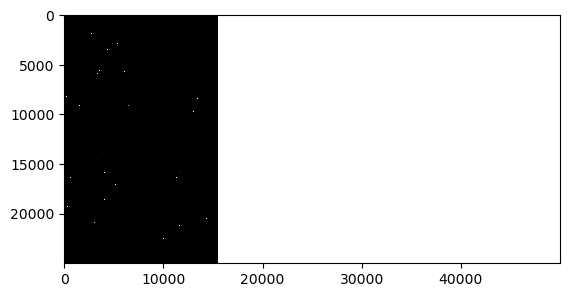

In [13]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(600,300))
plt.imshow(data, interpolation='nearest',)

In [2]:
import sys
from vispy import app, scene, visuals,use
from vispy.util.filter import gaussian_filter
import numpy as np
import vispy.io as io
from vispy.scene.visuals import Ellipse
# if offscreen 
# use egl or osmesa
import traceback
try:
    use( 'glfw')
except Exception as e:
    print(e)
    print(traceback.format_exc())
    pass


class StarCanvas(scene.SceneCanvas):
    def __init__(self):
        scene.SceneCanvas.__init__(self,keys='interactive', title='Isocurve(s) overlayed '
                           'over Random Image Example',show=False
                                  )
        

        # self.size =  800, 1600
        self.unfreeze()
        # Set up a viewbox to display the image with interactive pan/zoom
        self.view = self.central_widget.add_view()
        self.view.camera = scene.PanZoomCamera(aspect=1) # so it is 2d
        # Create the image
        num_stars = 1000
        positions = np.random.uniform(-1, 1, (num_stars, 2))  # x, y positions
        sizes = np.random.uniform(0, 20, num_stars) # varying sizes of stars
        positions[:,0] *= 800/600
        # Create a scatter plot with circular markers representing the stars
        scatter = scene.visuals.Markers()
        scatter.set_data(positions, edge_color=None, face_color='white', size=sizes, symbol='o')
        
        # Add scatter plot to the view
        self.view.add(scatter)
        # self.show()
        # self.view.camera = 'turntable'

class StarCanvas_(scene.SceneCanvas):
    def __init__(self, n_stars):
        scene.SceneCanvas.__init__(
            self,keys='interactive', title='Isocurve(s) overlayed '
                           'over Random Image Example',show=False,
            size=(1000,500)
        )
        self.unfreeze()
        self.n_stars = n_stars 
        self.view = self.central_widget.add_view()
        self.view.camera = scene.TurntableCamera() # so it is 2d
        np.random.seed(0)  # todo: use torch random state
        cos_pos_theta = np.random.uniform(-1,1, n_stars)
        pos_theta = np.arccos(cos_pos_theta)
        pos_phi = np.random.uniform(0,2*np.pi, n_stars)
        sizes = np.random.uniform(0, .002, n_stars) 
        
        h = sizes
        w = sizes / np.sin(pos_theta)
        centers = np.vstack([pos_phi,pos_theta]).T
        self.unfreeze()
        for i in range(n_stars):
            star = Ellipse(
                center=centers[i],
                radius=[w[i],h[i]],
                color='white'
            )
            # star.unfreeze()
            self.view.add(star)
        
    

canvas = StarCanvas_(100)
# canvas.app.run()
# canvas.show()
img=canvas.render()
io.write_png("res/star.png",img)
app.quit()
# TODO: different layers 

# a new thread
# with canvas 
# with thread lock


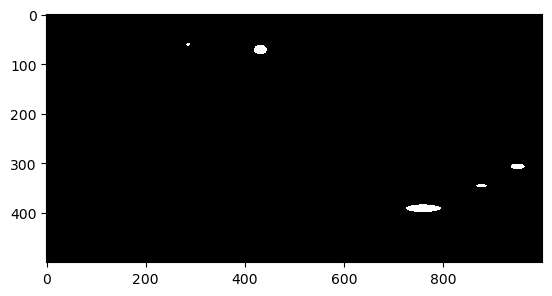

In [55]:
# img.shape
from matplotlib import pyplot as plt
# plt.figure(figsize=(600,300))
plt.imshow(img, interpolation='nearest')

In [83]:
data.shape

(480, 640, 4)

In [2]:
img.shape, img_.shape

NameError: name 'img_' is not defined

In [3]:
img_ = rgba_mpl2pd3d(img)

NameError: name 'rgba_mpl2pd3d' is not defined

In [27]:
import filepath
import os
from util.repo import res_root
from util.texture import np2texture, rgba_mpl2pd3d
from panda3d.core import PNMImage, Texture
from panda3d_game.app import *
from demos.ball_room import MassedBall,tmoon
from panda3d.core import (
    Geom,
    GeomNode,
    GeomTriangles,
    GeomVertexData,
    GeomVertexFormat,
    GeomVertexWriter,
    GeomEnums
)
from panda3d.core import (
    NodePath,
    CardMaker,
    Texture,
    CardMaker,
    Point2,
    Vec3
)
from art.basic import create_cylinder_node, create_sphere_node
# import direct.directbase.DirectStart
from util.physics import autocomplete_units, G_val, getG
from panda3d.core import AmbientLight
startext = np2texture(
    img, format_=Texture.F_rgba)
startext.setWrapU(Texture.WM_clamp)
startext.setWrapV(Texture.WM_clamp)
type(startext)
from sympy.physics.units import (
    kilometer, meter,centimeter,
    gram, kilogram, tonne,
    newton, second
)

SORT_BG = 10
tstar = Texture()
tstar.read(os.path.join(res_root, "starlight.jpg"))
tstar.setWrapU(Texture.WM_repeat)
tstar.setWrapV(Texture.WM_repeat)

class StarCylinder(ControlShowBase):
    def __init__(self):
        ContextShowBase.__init__(self)
        ControlShowBase.__init__(self)
        self.cylinder = create_sphere_node("1", 20, 20)
        self.rdr_scene.attachNewNode(self.cylinder)
        npth = NodePath(self.cylinder)
        self.set_texture()
        # ambientLight = AmbientLight('ambientLight')
        # ambientLight.setColor((0.1, 0.1, 0.1, 1))
        # ambientLightNP = self.rdr_scene.attachNewNode(ambientLight)
        # self.rdr_scene.setLight(ambientLightNP)
        
        # npth.setColor((1, 1, 1, 1))

        # self.cylinder.setTexture(startext)
        # npth.setTwoSided(True)
        
    def set_texture(self):
        npth = NodePath(self.cylinder)
        npth.set_texture(tstar)

class StarSphere(ControlShowBase):
    def __init__(self):
        ContextShowBase.__init__(self)
        ControlShowBase.__init__(self)
        self.stars = create_sphere_node("stars", 12,12, interior=True)
        
        self.rdr_scene.attachNewNode(self.stars)
        npth = NodePath(self.stars)
        npth.set_texture(tstar)
        npth.setScale(20)
        npth.setTwoSided(True)
        npth.setBin("background", SORT_BG)
        npth.setDepthTest(False)
        npth.setDepthWrite(False)
        self.stars_path = npth
        self.taskMgr.add(self.updateStarsTask)

    def updateStarsTask(self, task):
        self.stars_path.setPos(self.display_camera.getPos())
        return task.cont

class PlanetSphere(StarSphere,PhysicsShowBase):
    def __init__(self):
        
        StarSphere.__init__(self)
        PhysicsShowBase.__init__(self)
        self.bullet_world.setGravity((0,0,0))
        self.unit = {
            "mass" : tonne,
            "length" : 100*meter,
            "time": 1 * second,
            # "force" : sp.Number(1e3) * newton
        }
        autocomplete_units(self.unit)
        self.planet1 = MassedBall(
            name="planet1",
            radius=100*meter,
            mass=1e6*tonne,
            units=self.unit
        )
        self.planet1.reparentTo(self.render)
        self.planet1.set_texture(tmoon)
        self.planet1.setScale(10)

In [28]:
if __name__ == "__main__":
    from ui.abstract_ui import InterfacePlaceHolder
    import builtins
    import traceback
    # interface = InterfacePlaceHolder()
    try:
        with StarCylinder() as app_:
            # console = PhyscRoomConsole(showbase=app)
            # interface = CMDInterface(console=console)
            # .start()
            # start a thread of app
            app_.run()
    except Exception as e:
        print(e)
        print(traceback.format_exc())
    finally:
        if hasattr(builtins, 'base'):
            builtins.base.destroy()
        # interface.join()


Known pipe types:
  glxGraphicsPipe
(all display modules loaded.)
:audio(error): Couldn't open default OpenAL device
:audio(error): OpenALAudioManager: No open device or context
:audio(error):   OpenALAudioManager is not valid, will use NullAudioManager
:audio(error): Couldn't open default OpenAL device
:audio(error): OpenALAudioManager: No open device or context
:audio(error):   OpenALAudioManager is not valid, will use NullAudioManager


init ContextShowBase
---set ref---:render,<class 'panda3d.core.NodePath'>
---<__main__.StarCylinder object at 0x7fdafc1787d0> run(), at 2024-10-05 07:40:15.397179---
---<__main__.StarCylinder object at 0x7fdafc1787d0> destroy at 2024-10-05 07:40:51.058742---
---<__main__.StarCylinder object at 0x7fdafc1787d0> destroyed at 2024-10-05 07:40:51.059960, exit---


SystemExit: 

In [1]:
import vispy
import datashader as ds
import pyqtgraph as pg

/media/ywatcher/ExtDisk1/LDisk/Packages/game_env/env/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
